This document will explore some ideas for the data analyis of a dampenend harmonic oscillator. It covers some topics from the lecture "Datenanalyse in der Physik". Shown below is an image of the setup used. The acceleration of the bottle was measured using an es8266 chip and an lsm303 9-axis IMU device. Here, we only utilised the accelerometer. This ipynb file has a format that could easily be modified to a "sample exercise sheet".

![title](setup.jpeg)


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#constants
mg= 10**(-3) / 9.812 #the unit of the accelerometer in terms of m/s^2, as given by the manufacturer

In [5]:
startingIndex=[66,24,37] #defines where the oscillation starts, for better analysis of data
data_set=[]
#There are three measurements, and three sets of data. 
for n in range (0,3):
    df = pd.read_csv('results'+str(n)+'.csv')
    df=df.truncate(before=startingIndex[n],after=df.shape[0])
    df=np.array(df) 
    for i in range(0,3):
        df[:,i]=(df[:,i])*mg
        df[:,i]=df[:,i] -np.average(df[:,i]) #We want to make sure the osillations occur around the x axis, since the sensor also detects gravity 
    df[:,3]=(df[:,3]-df[0,3])/1000
    #print (df)
    data_set.append(df)
N=len(df[:,3])

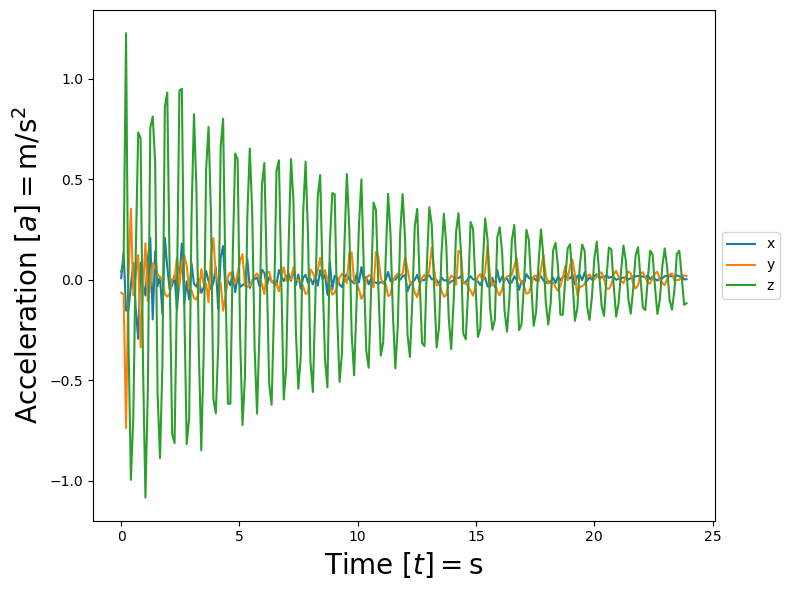

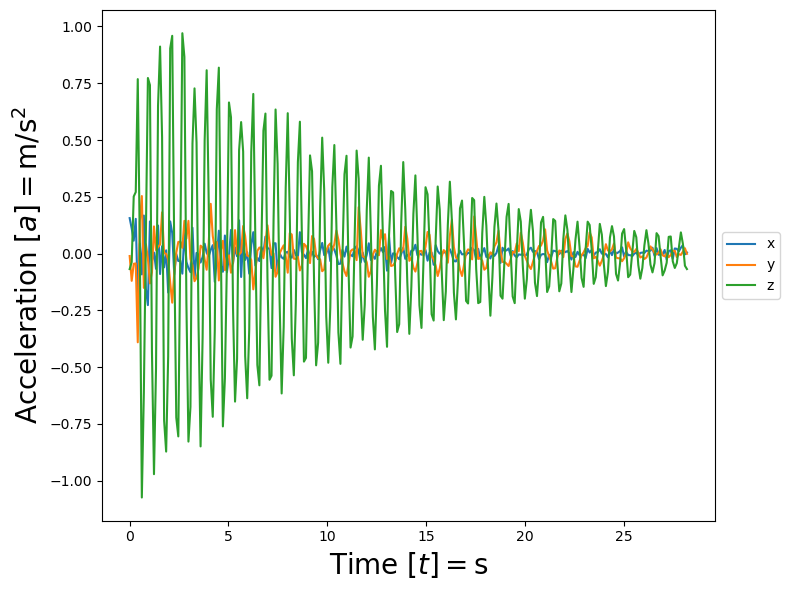

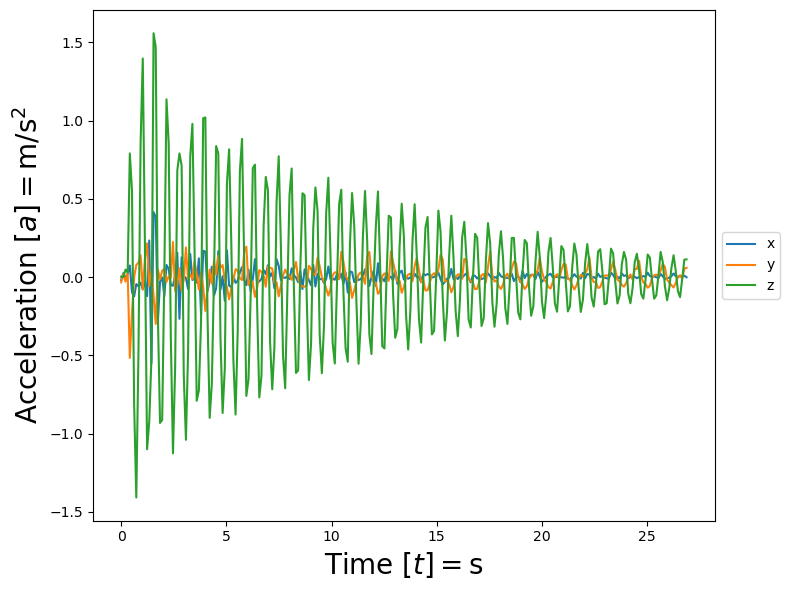

In [6]:
#We begin by plotting our results from the experiment. There are three data sets. Is this data usable?
for data in data_set:
    fig, ax = plt.subplots(figsize=(8, 6), tight_layout=True)
    ax.set_ylabel(r'Acceleration $[a]= \mathrm{m/s^2}$',fontsize=20)
    ax.set_xlabel(r'Time $[t]=\mathrm{s}$',fontsize=20)
    axes=['x','y','z']
    
    for i in range(0,3):
        
        ax.plot(data[:,3],data[:,i],label=axes[i])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

Next, we want to analyse the given data. For this, we utilise two methods. We first do a Fourier transform to determine the frequency at which the oscillation occurs. Next, we want to fit the data with a dampened cosine wave, which is the expected function for a damped harmonic oscillator (considering that the form of the function stays the same)

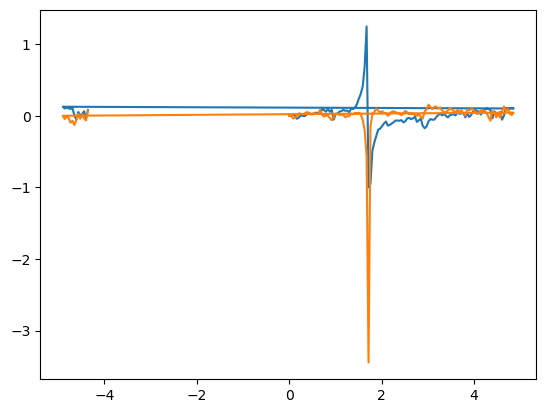

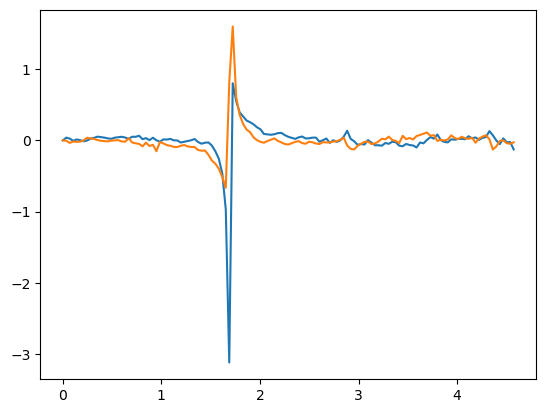

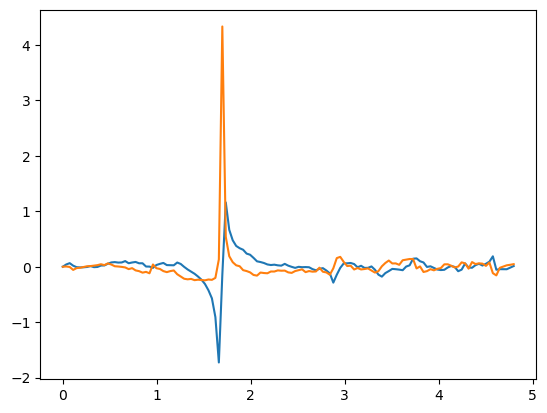

[10.52988990645146, 10.83002955015477, 10.901462196369026] [3.749176672794059, 3.6452733043367602, 3.621387378429528]


In [12]:
omegas=[]
Ts=[]
for data in data_set:
    #Here the np.fft functions are used. Could be replaced with functions defined from the lecture
    t = data[:,3]
    timeStep= t[1]-t[0]
    sp =  (np.fft.fft(data[:,2],norm="ortho"))
    freq = np.fft.fftfreq(t.shape[-1],timeStep)
    freq=freq[:int(N/2)]
    
    sp=sp[:int(N/2)]
    
    plt.plot(freq, sp.real, freq, sp.imag)
    plt.show()
    
    omega=(freq[np.argmax(sp)])
    omegas.append(omega*2*np.pi)
    Ts.append(2*np.pi/omega)

print(omegas,Ts)

Here we print the results of our Fourier Transform, first the $\omega$ and the period. However, we notice here that the result of the FFT gives us the values in cycles per second. To recieve the term $\omega$ inside $cos(\omega t)$, we must multiply $2\pi$ and divide by the result of the FFT

[[Model]]
    Model(decay_cosine)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 69
    # data points      = 234
    # variables        = 4
    chi-square         = 1.61838168
    reduced chi-square = 0.00703644
    Akaike info crit   = -1155.89130
    Bayesian info crit = -1142.07001
    R-squared          = 0.95477281
[[Variables]]
    amp:    1.08809040 +/- 0.02335610 (2.15%) (init = 2)
    beta:   0.08280400 +/- 0.00285825 (3.45%) (init = 0.5)
    omega:  10.7160844 +/- 0.00283054 (0.03%) (init = 10.75379)
    phi:   -1.72437513 +/- 0.02102309 (1.22%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp, beta)  = 0.744
    C(omega, phi) = -0.737


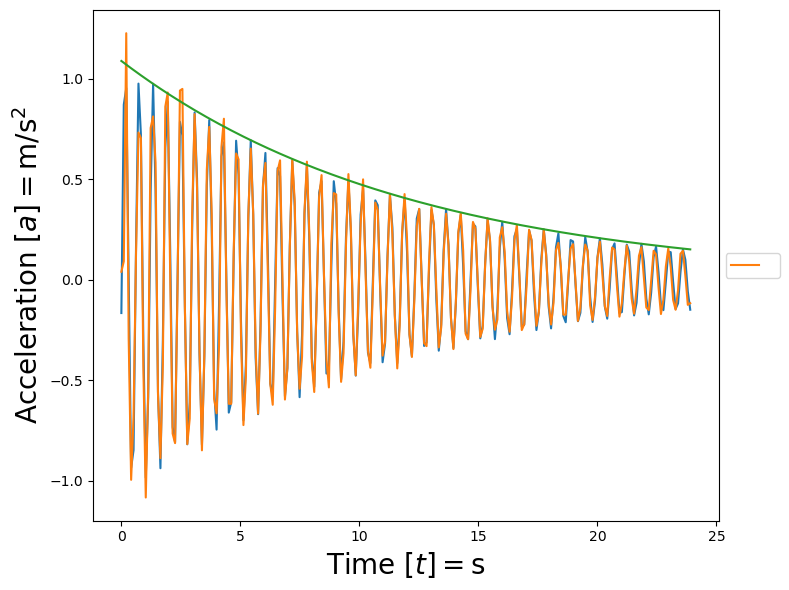

[[Model]]
    Model(decay_cosine)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 79
    # data points      = 276
    # variables        = 4
    chi-square         = 2.75240878
    reduced chi-square = 0.01011915
    Akaike info crit   = -1263.78714
    Bayesian info crit = -1249.30554
    R-squared          = 0.92342349
[[Variables]]
    amp:   -1.00079817 +/- 0.02580024 (2.58%) (init = 2)
    beta:   0.07326212 +/- 0.00301390 (4.11%) (init = 0.5)
    omega:  10.7064653 +/- 0.00303289 (0.03%) (init = 10.75379)
    phi:   -0.74469504 +/- 0.02604707 (3.50%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(omega, phi) = -0.739
    C(amp, beta)  = -0.736


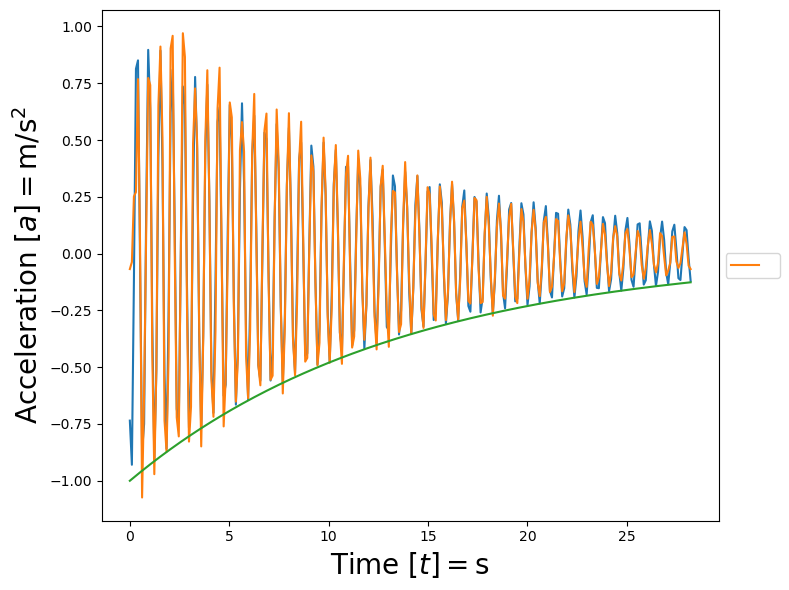

[[Model]]
    Model(decay_cosine)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 84
    # data points      = 263
    # variables        = 4
    chi-square         = 4.81658939
    reduced chi-square = 0.01859687
    Akaike info crit   = -1044.02313
    Bayesian info crit = -1029.73451
    R-squared          = 0.91349749
[[Variables]]
    amp:    1.25341380 +/- 0.03576279 (2.85%) (init = 2)
    beta:   0.07401709 +/- 0.00339446 (4.59%) (init = 0.5)
    omega:  10.6935113 +/- 0.00337775 (0.03%) (init = 10.75379)
    phi:    1.76254484 +/- 0.02818258 (1.60%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp, beta)  = 0.742
    C(omega, phi) = -0.738


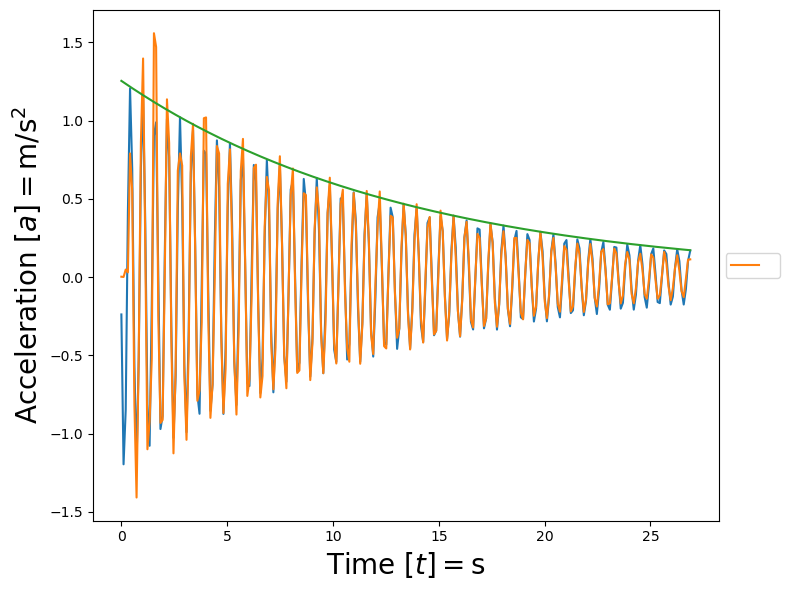

In [13]:
from lmfit import Model

#The expected model for a dampened harmonic oscillator
def decay_cosine(t, amp, beta, omega, phi):
    return amp * np.exp(-beta*t)* np.cos(omega*t + phi)


mod = Model(decay_cosine)
params = mod.make_params(amp=2.0, beta=0.5, omega=np.average(omegas), phi=0)

for data in data_set:
    fig, ax = plt.subplots(figsize=(8, 6), tight_layout=True)
    x=data[:,3]
    y=(data[:,2])
    result = mod.fit(y, params, t=x) #Fit function used from package, could also use fit from lecture! Which method works better?
    
    print(result.fit_report())

    #We plot our fit function against our measured data
    ax.plot(x,result.best_fit)
    ax.plot(x,y,label=" ")
    #We plot, using the fit variables, the damepening of the amplitude
    ax.plot(x, result.params['amp']*np.exp(-result.params['beta']*x))
    
    ax.set_xlabel(r'Time $[t]=\mathrm{s}$',fontsize=20)
    ax.set_ylabel(r'Acceleration $[a]= \mathrm{m/s^2}$',fontsize=20)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    


We can compare the fitted frequencies and the results from the FFT. Our results frome both analyses agree with what $\omega$ is. We see, with no error calculation what the error should be. (Exercise idea, calculate the error from Gaussian propogation, is this smaller or larger than the error we see qualitatively here)

Note: The graphs here show the "dampening factor" for the acceleration. We usually talk about this factor in terms of the position of the oscillator. 
BONUS:
Can we recover this information from the data we gathered? If not, why? If it is possible, how?